In [1]:
import numpy as np
from matplotlib import  pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn import cross_validation

/Users/zhuzhaohua/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 以鸢尾花数据进行测试

In [2]:
# 鸢尾花分类的数据
def load_data():
    iris = datasets.load_iris()
    return cross_validation.train_test_split(iris.data,iris.target,test_size=0.25,random_state=0)

In [3]:
# 测试：
def test_MLPClassifier(*data):
    X_train,X_test,Y_train,Y_test = data
    nn = MLPClassifier(activation='logistic',max_iter=10000,hidden_layer_sizes=(20,))
    nn.fit(X_train,Y_train)
    
    print('【训练集成绩】Training Score:{0}'.format(nn.score(X_train,Y_train)))
    print('【测试集成绩】Testing  Score:{0}'.format(nn.score(X_test,Y_test)))

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_MLPClassifier(X_train,X_test,Y_train,Y_test)

【训练集成绩】Training Score:0.9821428571428571
【测试集成绩】Testing  Score:0.9736842105263158


In [4]:
# 测试隐藏层对成绩的影响：
def test_MLPClassifier_hidden_layer(*data):
    X_train,X_test,Y_train,Y_test = data
    hidden_layers = ((10,),(30,),(100,),(5,5),(10,10),(30,30))
    for hidden_layer in hidden_layers:
        nn = MLPClassifier(activation='logistic',max_iter=10000,hidden_layer_sizes=hidden_layer)
        nn.fit(X_train,Y_train)
        print('hidden_layers : {0}'.format(hidden_layer))
        print('【训练集成绩】Training Score:{0}'.format(nn.score(X_train,Y_train)))
        print('【测试集成绩】Testing  Score:{0}'.format(nn.score(X_test,Y_test)))

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_MLPClassifier_hidden_layer(X_train,X_test,Y_train,Y_test)

hidden_layers : (10,)
【训练集成绩】Training Score:0.9821428571428571
【测试集成绩】Testing  Score:0.9736842105263158
hidden_layers : (30,)
【训练集成绩】Training Score:0.9821428571428571
【测试集成绩】Testing  Score:0.9736842105263158
hidden_layers : (100,)
【训练集成绩】Training Score:0.9821428571428571
【测试集成绩】Testing  Score:0.9736842105263158
hidden_layers : (5, 5)
【训练集成绩】Training Score:0.36607142857142855
【测试集成绩】Testing  Score:0.23684210526315788
hidden_layers : (10, 10)
【训练集成绩】Training Score:0.9821428571428571
【测试集成绩】Testing  Score:0.9736842105263158
hidden_layers : (30, 30)
【训练集成绩】Training Score:0.9821428571428571
【测试集成绩】Testing  Score:0.9736842105263158


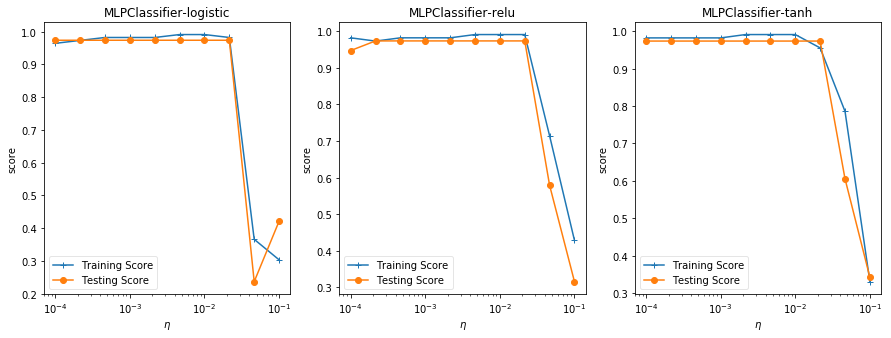

In [48]:
# 测试不同激活函数,不同学习率对成绩的影响
# 测试：
def test_MLPClassifier_activation(*data):
    train_x, test_x, train_y, test_y = data
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    activations = ('logistic','relu','tanh')
    etas = np.logspace(-4, -1,10)
    for i, activation  in enumerate(activations):
        train_score = []
        test_score = []
        for eta in  etas:
                nn = MLPClassifier(activation=activation,learning_rate_init=eta,max_iter=10000)
                nn.fit(X_train,Y_train)
                train_score.append(nn.score(train_x,train_y))
                test_score.append(nn.score(test_x,test_y))
    
        # 绘图：
        ax = fig.add_subplot(1,3,i+1)
        ax.plot(etas,train_score,label='Training Score',marker='+')
        ax.plot(etas,test_score, label='Testing Score',marker='o')
        ax.set_xlabel(r'$\eta$')
        ax.set_ylabel('score')
        ax.set_title('MLPClassifier-{0}'.format(activation))
        ax.set_xscale('log')
        ax.legend(loc='best',framealpha=0.5)
    plt.show()

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_MLPClassifier_activation(X_train,X_test,Y_train,Y_test)

# 以手写数字进行测试

In [38]:
# 数字识别能力
def load_data2():
    digits = datasets.load_digits()
    return cross_validation.train_test_split(digits.data,digits.target,test_size=0.25,random_state=0, stratify=digits.target)

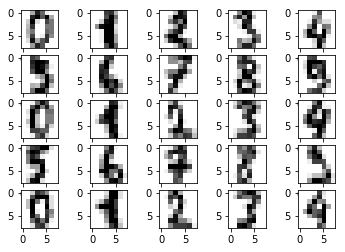

In [39]:
# 显示Digit数据
def show_digits():
    digits = datasets.load_digits()
    fig = plt.figure()
    #print('images 0 :',digits.data[0])
    for i in range(25):
        ax = fig.add_subplot(5,5,i+1)
        #print(digits.images[i])
        ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

show_digits()

In [54]:
# 测试：
def test_MLPClassifier2(*data):
    X_train,X_test,Y_train,Y_test = data
    nn = MLPClassifier(activation='logistic',max_iter=10000,hidden_layer_sizes=(50,))
    nn.fit(X_train,Y_train)
    
    print('【训练集成绩】Training Score:{0}'.format(nn.score(X_train,Y_train)))
    print('【测试集成绩】Testing  Score:{0}'.format(nn.score(X_test,Y_test)))
# 测试：
# 开始测试：
X_train,X_test,Y_train,Y_test = load_data2()
test_MLPClassifier2(X_train,X_test,Y_train,Y_test)

【训练集成绩】Training Score:1.0
【测试集成绩】Testing  Score:0.9777777777777777
